<a href="https://colab.research.google.com/github/phantom-balance/TEP/blob/master/TEP_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/phantom-balance/TEP.git
%cd TEP

Cloning into 'TEP'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 237 (delta 67), reused 196 (delta 39), pack-reused 0
Receiving objects: 100% (237/237), 57.02 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (67/67), done.
/content/TEP


In [2]:
import matplotlib
import matplotlib.pyplot as plt
from PCA_limit import PCA

In [3]:
Type = [0]
Info = PCA(Type=Type, var_explained=0.40, confidence=0.99)
reduced_dim, UCL_T2, UCL_Q, Data_list = Info.return_func()
print("UCL_T2="+str(float(UCL_T2))+" UCL_Q="+str(float(UCL_Q)))


UCL_T2=13.865531890687725 UCL_Q=59.03981803243803


/content/TEP/PCA_limit.py:34: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ../aten/src/ATen/native/Copy.cpp:244.)
  truncated_eigen_vectors = truncated_eigen_vectors.type(torch.double)


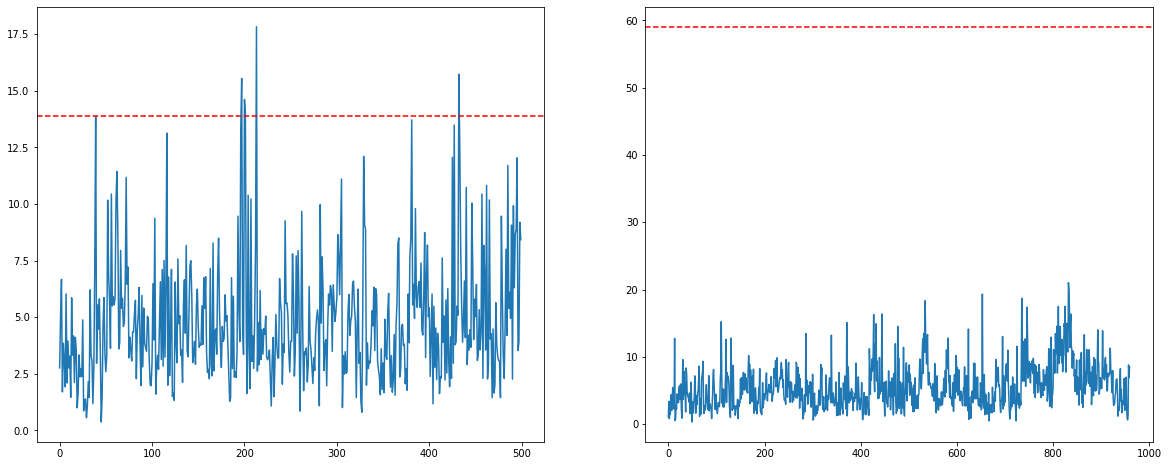

In [4]:
# T2 control chart and Q control chart for NOC
fig, ax = plt.subplots(len(Type), 2, figsize=(20, 8))

(train, test) = Data_list[0]

ax[0].plot(train.numpy())
ax[0].axhline(UCL_T2, color='r', ls='--')
ax[1].plot(test.numpy())
ax[1].axhline(UCL_Q, color='r', ls='--')

In [5]:
Type = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
Info = PCA(Type=Type, var_explained=0.40, confidence=0.99)
reduced_dim, UCL_T2, UCL_Q, Data_list = Info.return_func()
print("UCL_T2="+str(float(UCL_T2))+" UCL_Q="+str(float(UCL_Q)))

UCL_T2=13.865531890687725 UCL_Q=59.03981803243803


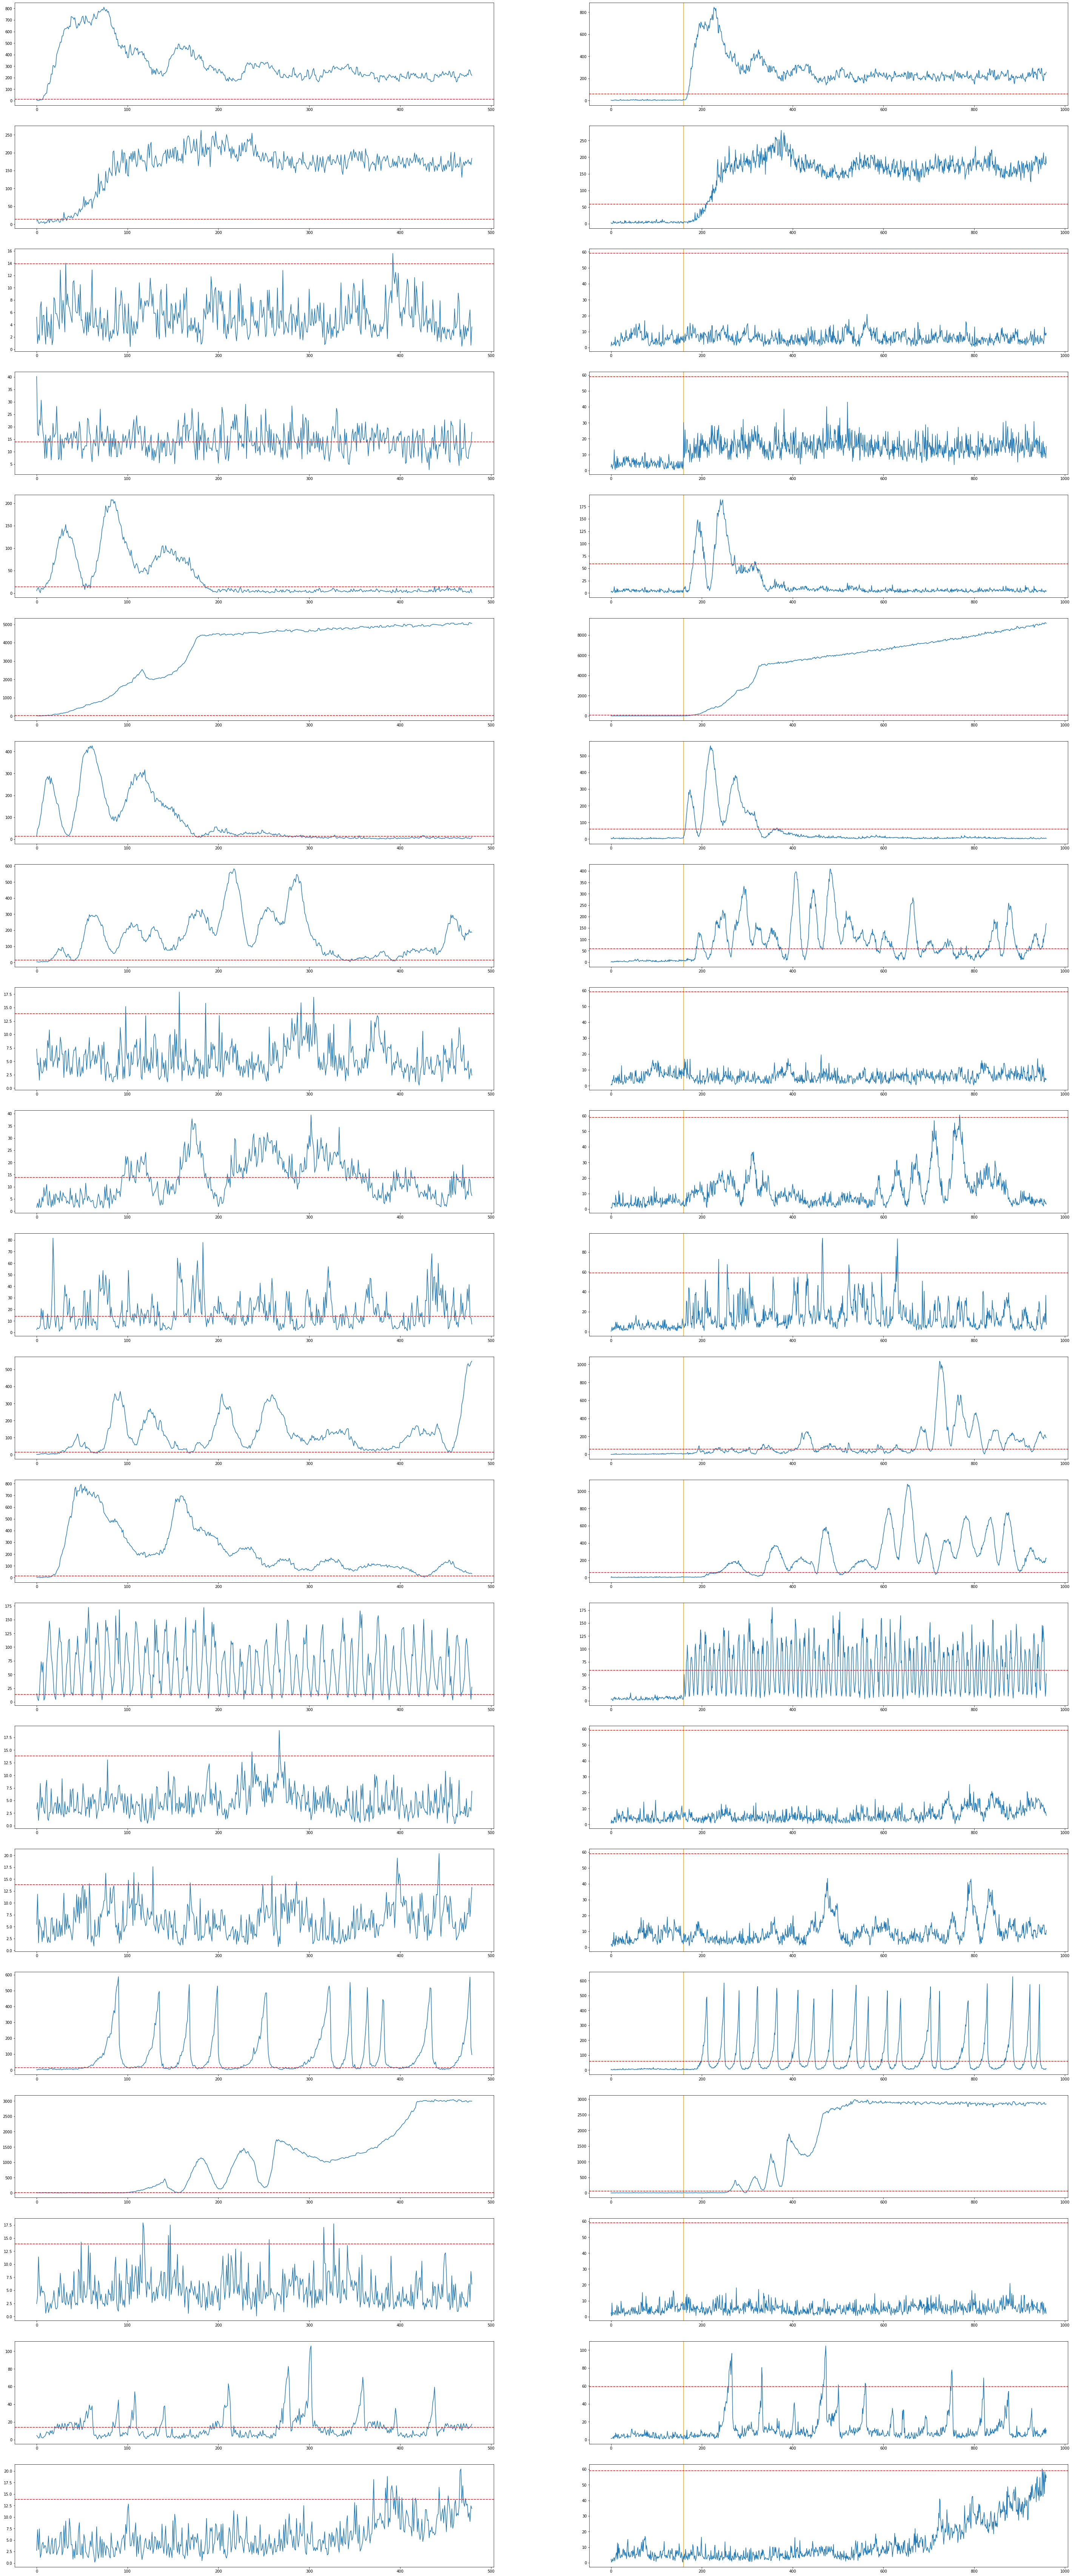

In [7]:
# T2 control chart and Q control chart for different faults
fig, ax = plt.subplots(len(Type), 2, figsize=(50, 125))

for i,(train, test) in enumerate(Data_list):
  ax[i,0].plot(train.numpy())
  ax[i,0].axhline(UCL_T2, color='r', ls='--')
  ax[i,1].axvline(160, color='orange')
  ax[i,1].plot(test.numpy())
  ax[i,1].axhline(UCL_Q, color='r', ls='--')